In [10]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np
import matplotlib.dates as mdates


# Load the data from the csv file, and parse the dates to datetime format
df_TAT = pd.read_csv("Example-Daten-CSV.csv", sep = ";", parse_dates=["Erfassung der Anforderung", "Probenverteilung", "Proben auf Strasse", 
    "Zentrifugation", "Analyten werden gemessen", "Resultate werden übermittelt", 
    "Technische Validation", "Medizinische Validation", "Erstellen & Versenden Bericht"
]) 
df_TAT.head()
df_TAT.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Probennummer                   12 non-null     int64         
 1   Analyt                         12 non-null     object        
 2   Erfassung der Anforderung      12 non-null     datetime64[ns]
 3   Probenverteilung               12 non-null     datetime64[ns]
 4   Proben auf Strasse             12 non-null     datetime64[ns]
 5   Zentrifugation                 12 non-null     datetime64[ns]
 6   Analyten werden gemessen       12 non-null     datetime64[ns]
 7   Resultate werden übermittelt   12 non-null     datetime64[ns]
 8   Technische Validation          12 non-null     datetime64[ns]
 9   Medizinische Validation        12 non-null     datetime64[ns]
 10  Erstellen & Versenden Bericht  12 non-null     datetime64[ns]
dtypes: datetime64[ns](9),

In [11]:
# Add 7 minutes to "Zentrifugation" column to create "Zentrifugation Ende"
df_TAT['Zentrifugation Ende'] = df_TAT['Zentrifugation'] + pd.Timedelta(minutes=7)
# Rearrange columns to place "Zentrifugation Ende" after "Zentrifugation"
cols = df_TAT.columns.tolist()
zentrifugation_index = cols.index('Zentrifugation')
cols.insert(zentrifugation_index + 1, cols.pop(cols.index('Zentrifugation Ende')))
df_TAT = df_TAT[cols]
df_TAT.head()


,Probennummer,Analyt,Erfassung der Anforderung,Probenverteilung,Proben auf Strasse,Zentrifugation,Zentrifugation Ende,Analyten werden gemessen,Resultate werden übermittelt,Technische Validation,Medizinische Validation,Erstellen & Versenden Bericht
0,2211334401,Troponin,2024-10-01 10:09:00,2024-10-01 10:30:00,2024-10-01 11:05:00,2024-10-01 14:18:00,2024-10-01 14:25:00,2024-10-01 14:27:00,2024-10-01 15:10:00,2024-10-01 15:28:00,2024-10-01 15:49:00,2024-10-01 16:20:00
1,2211334401,CRP,2024-10-01 08:45:00,2024-10-01 09:30:00,2024-10-01 10:00:00,2024-10-01 10:15:00,2024-10-01 10:22:00,2024-10-01 10:45:00,2024-10-01 11:00:00,2024-10-01 11:20:00,2024-10-01 11:35:00,2024-10-01 12:00:00
2,2211334402,D-Dimer,2024-10-01 09:10:00,2024-10-01 10:00:00,2024-10-01 10:35:00,2024-10-01 10:50:00,2024-10-01 10:57:00,2024-10-01 11:15:00,2024-10-01 11:35:00,2024-10-01 11:50:00,2024-10-01 12:10:00,2024-10-01 12:40:00
3,2211334403,Troponin,2024-10-01 10:00:00,2024-10-01 10:45:00,2024-10-01 11:20:00,2024-10-01 11:30:00,2024-10-01 11:37:00,2024-10-01 11:55:00,2024-10-01 12:15:00,2024-10-01 12:30:00,2024-10-01 12:50:00,2024-10-01 13:15:00
4,2211334404,CRP,2024-10-01 11:20:00,2024-10-01 12:05:00,2024-10-01 12:35:00,2024-10-01 12:50:00,2024-10-01 12:57:00,2024-10-01 13:10:00,2024-10-01 13:30:00,2024-10-01 13:50:00,2024-10-01 14:05:00,2024-10-01 14:30:00


In [12]:
phases = {
    "Präanalytische Phase": ["Erfassung der Anforderung", "Probenverteilung", "Proben auf Strasse","Zentrifugation", "Zentrifugation Ende"],
    "Analytische Phase": ["Analyten werden gemessen", "Resultate werden übermittelt"],
    "Postanalytische Phase": ["Technische Validation","Medizinische Validation", "Erstellen & Versenden Bericht"]
}

# Example of accessing the data structure
for phase, checkpoints in phases.items():
    print(f"{phase}:")
    for checkpoint in checkpoints:
        print(f"  - {checkpoint}")

Präanalytische Phase:
  - Erfassung der Anforderung
  - Probenverteilung
  - Proben auf Strasse
  - Zentrifugation
  - Zentrifugation Ende
Analytische Phase:
  - Analyten werden gemessen
  - Resultate werden übermittelt
Postanalytische Phase:
  - Technische Validation
  - Medizinische Validation
  - Erstellen & Versenden Bericht


In [13]:
for phase, checkpoints in phases.items():
    # Calculate the time difference between "Erfassung der Anforderung" and "Zentrifugation Ende"
    df_TAT[f"{phase}"] = df_TAT[checkpoints[-1]] - df_TAT[checkpoints[0]]
    df_TAT[f"{phase}"] = df_TAT[f"{phase}"].dt.total_seconds() / 60
df_TAT


,Probennummer,Analyt,Erfassung der Anforderung,Probenverteilung,Proben auf Strasse,Zentrifugation,Zentrifugation Ende,Analyten werden gemessen,Resultate werden übermittelt,Technische Validation,Medizinische Validation,Erstellen & Versenden Bericht,Präanalytische Phase,Analytische Phase,Postanalytische Phase
0,2211334401,Troponin,2024-10-01 10:09:00,2024-10-01 10:30:00,2024-10-01 11:05:00,2024-10-01 14:18:00,2024-10-01 14:25:00,2024-10-01 14:27:00,2024-10-01 15:10:00,2024-10-01 15:28:00,2024-10-01 15:49:00,2024-10-01 16:20:00,256.0,43.0,52.0
1,2211334401,CRP,2024-10-01 08:45:00,2024-10-01 09:30:00,2024-10-01 10:00:00,2024-10-01 10:15:00,2024-10-01 10:22:00,2024-10-01 10:45:00,2024-10-01 11:00:00,2024-10-01 11:20:00,2024-10-01 11:35:00,2024-10-01 12:00:00,97.0,15.0,40.0
2,2211334402,D-Dimer,2024-10-01 09:10:00,2024-10-01 10:00:00,2024-10-01 10:35:00,2024-10-01 10:50:00,2024-10-01 10:57:00,2024-10-01 11:15:00,2024-10-01 11:35:00,2024-10-01 11:50:00,2024-10-01 12:10:00,2024-10-01 12:40:00,107.0,20.0,50.0
3,2211334403,Troponin,2024-10-01 10:00:00,2024-10-01 10:45:00,2024-10-01 11:20:00,2024-10-01 11:30:00,2024-10-01 11:37:00,2024-10-01 11:55:00,2024-10-01 12:15:00,2024-10-01 12:30:00,2024-10-01 12:50:00,2024-10-01 13:15:00,97.0,20.0,45.0
4,2211334404,CRP,2024-10-01 11:20:00,2024-10-01 12:05:00,2024-10-01 12:35:00,2024-10-01 12:50:00,2024-10-01 12:57:00,2024-10-01 13:10:00,2024-10-01 13:30:00,2024-10-01 13:50:00,2024-10-01 14:05:00,2024-10-01 14:30:00,97.0,20.0,40.0
5,2211334405,D-Dimer,2024-10-01 08:55:00,2024-10-01 09:30:00,2024-10-01 09:50:00,2024-10-01 10:15:00,2024-10-01 10:22:00,2024-10-01 10:35:00,2024-10-01 10:50:00,2024-10-01 11:10:00,2024-10-01 11:25:00,2024-10-01 11:50:00,87.0,15.0,40.0
6,2211334406,Troponin,2024-10-01 10:20:00,2024-10-01 11:00:00,2024-10-01 11:30:00,2024-10-01 11:45:00,2024-10-01 11:52:00,2024-10-01 12:05:00,2024-10-01 12:20:00,2024-10-01 12:40:00,2024-10-01 13:00:00,2024-10-01 13:25:00,92.0,15.0,45.0
7,2211334407,CRP,2024-10-01 09:30:00,2024-10-01 10:20:00,2024-10-01 10:50:00,2024-10-01 11:05:00,2024-10-01 11:12:00,2024-10-01 11:25:00,2024-10-01 11:45:00,2024-10-01 12:05:00,2024-10-01 12:20:00,2024-10-01 12:45:00,102.0,20.0,40.0
8,2211334408,D-Dimer,2024-10-01 07:50:00,2024-10-01 08:35:00,2024-10-01 09:10:00,2024-10-01 09:30:00,2024-10-01 09:37:00,2024-10-01 09:50:00,2024-10-01 10:05:00,2024-10-01 10:25:00,2024-10-01 10:45:00,2024-10-01 11:10:00,107.0,15.0,45.0
9,2211334409,Troponin,2024-10-01 11:55:00,2024-10-01 12:40:00,2024-10-01 13:10:00,2024-10-01 13:25:00,2024-10-01 13:32:00,2024-10-01 13:45:00,2024-10-01 14:05:00,2024-10-01 14:20:00,2024-10-01 14:40:00,2024-10-01 15:05:00,97.0,20.0,45.0


In [14]:
df_TAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Probennummer                   12 non-null     int64         
 1   Analyt                         12 non-null     object        
 2   Erfassung der Anforderung      12 non-null     datetime64[ns]
 3   Probenverteilung               12 non-null     datetime64[ns]
 4   Proben auf Strasse             12 non-null     datetime64[ns]
 5   Zentrifugation                 12 non-null     datetime64[ns]
 6   Zentrifugation Ende            12 non-null     datetime64[ns]
 7   Analyten werden gemessen       12 non-null     datetime64[ns]
 8   Resultate werden übermittelt   12 non-null     datetime64[ns]
 9   Technische Validation          12 non-null     datetime64[ns]
 10  Medizinische Validation        12 non-null     datetime64[ns]
 11  Erstellen & Versenden

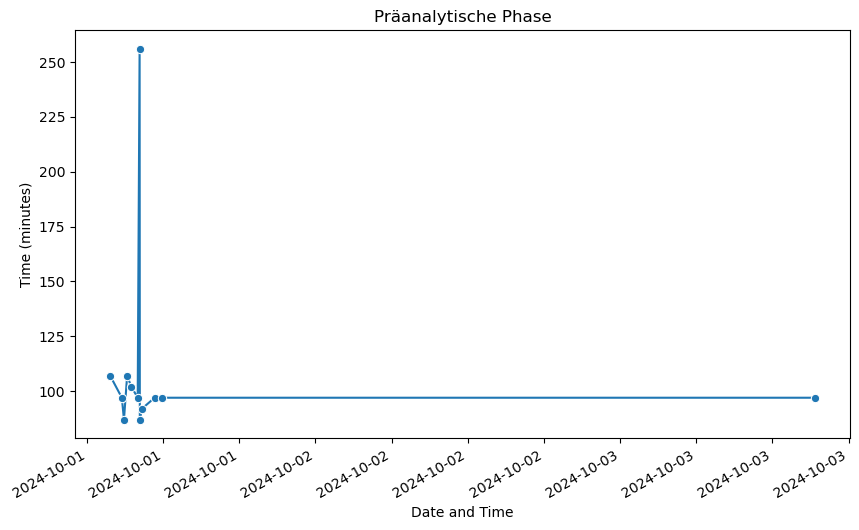

In [15]:
# Generate charts for each phase
# Line chart
fig=plt.figure(figsize=(10, 6))
sns.lineplot(x=df_TAT["Erfassung der Anforderung"], y='Präanalytische Phase', data=df_TAT, marker='o')
ax=plt.gca()
# format data to desired format. Here I chose YYYY-MM-DD 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Präanalytische Phase')
plt.xlabel('Date and Time')
plt.ylabel('Time (minutes)')
plt.show()

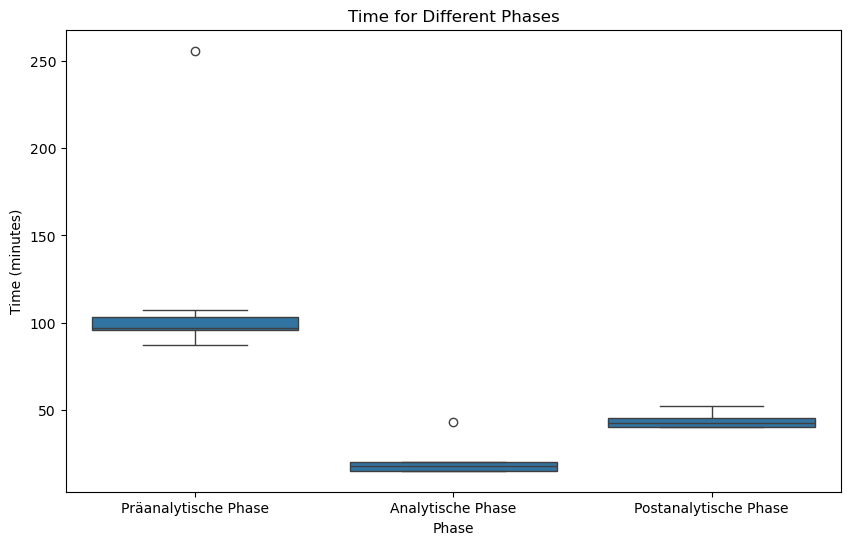

In [16]:
# Select only the columns that contain numeric time data
time_columns = ["Präanalytische Phase", "Analytische Phase", "Postanalytische Phase"]

# Melt the DataFrame to long format for seaborn
df_melted = df_TAT.melt(id_vars=["Erfassung der Anforderung"], value_vars=time_columns, var_name='Phase', value_name='Time (minutes)')

# Create a box and whiskers plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Phase', y='Time (minutes)', data=df_melted)
plt.title('Time for Different Phases')
plt.ylabel('Time (minutes)')
plt.xlabel('Phase')
plt.show()

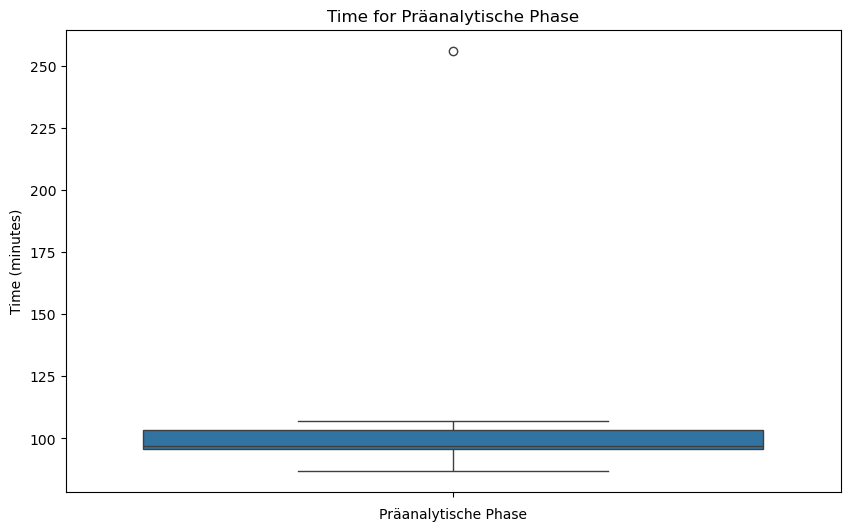

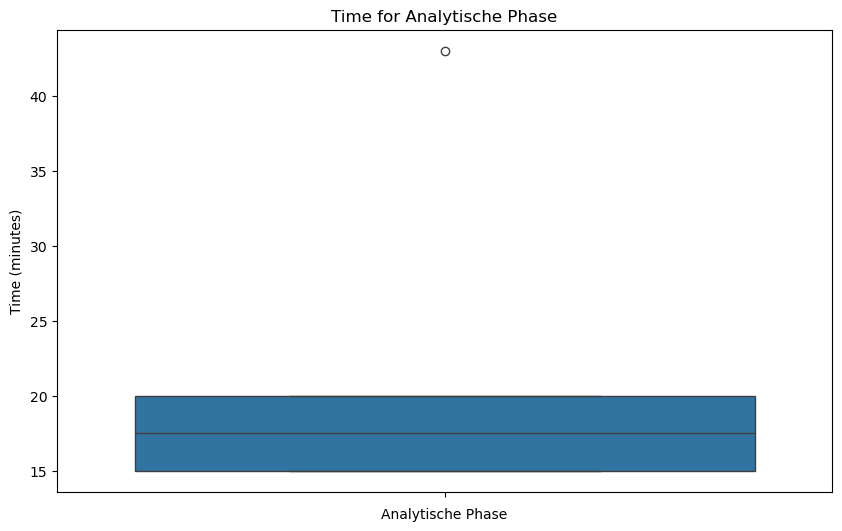

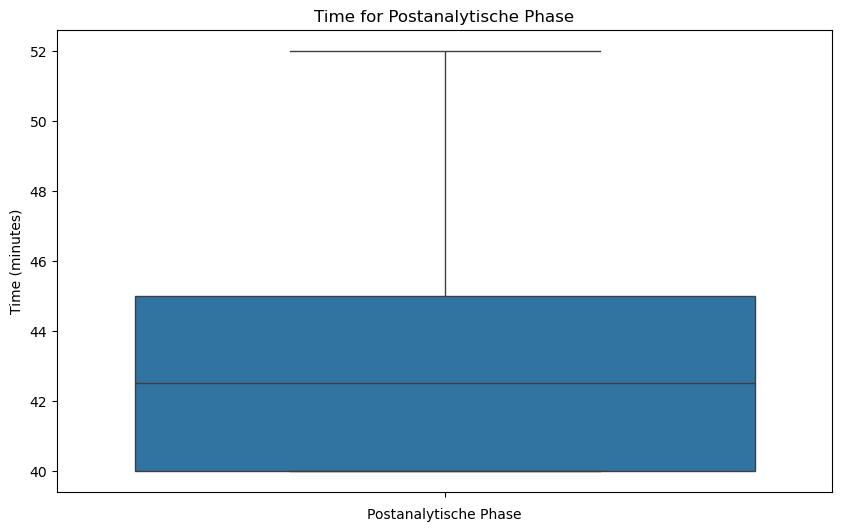

In [17]:
# Create separate box and whiskers plots for each phase
phases = df_melted['Phase'].unique()
for phase in phases:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='Time (minutes)', data=df_melted[df_melted['Phase'] == phase])
    plt.title(f'Time for {phase}')
    plt.ylabel('Time (minutes)')
    plt.xlabel(phase)
    plt.show()